In [1]:
import pandas as pd

In [2]:
# Load the dataset
data = pd.read_csv('DVM App Inspections.csv')

# Display the first few rows
data.head()

,DateUtc,VIN,Make,Model,Location,ReportedBy,Company,EmailAddress,Inspection Organisation,Inspection Type,Inspection Organisation External ID,DefectsFound,AIAG,Position,Damage,Severity,Notes
0,2025-05-16 06:48:01,WF0LXXTA0LSJ58477,Ford,Transit Custom V710 Bus,"Rheda-Wiedenbrück, Nordrhein-Westfalen, DE",Dennis Brinkmann,Westfalia,Dennis.Brinkmann@westfalen-mobil.de,Westfalia,Bodybuilder/Converter,Westfalia,Yes,15-02-1,"Qtr. Panel or Pick-Up Box, Left",Inoperable,"<1"" / < 2.5cm",NaN
1,2025-05-16 06:48:01,WF0LXXTA0LSJ58477,Ford,Transit Custom V710 Bus,"Rheda-Wiedenbrück, Nordrhein-Westfalen, DE",Dennis Brinkmann,Westfalia,Dennis.Brinkmann@westfalen-mobil.de,Westfalia,Bodybuilder/Converter,Westfalia,Yes,09-05-1,"Door, Cargo (Sliding) R/L",Chipped - Does not apply to glass or panel edge,"<1"" / < 2.5cm",NaN
2,2025-05-16 06:24:43,WF0LXXTA0LSM08204,Ford,Transit Custom V710 Bus,"Rheda-Wiedenbrück, Nordrhein-Westfalen, DE",Nicky-Marlow Norris,Westfalia,Nicky-Marlow.Norris@westfalen-mobil.de,Westfalia,Bodybuilder/Converter,Westfalia,Yes,09-14-2,"Door, Cargo (Sliding) R/L",Dented Paint/Chrome not damaged,"From 1"" - 3"" / 2.5cm - 7.5cm.",NaN
3,2025-05-16 06:24:43,WF0LXXTA0LSM08204,Ford,Transit Custom V710 Bus,"Rheda-Wiedenbrück, Nordrhein-Westfalen, DE",Nicky-Marlow Norris,Westfalia,Nicky-Marlow.Norris@westfalen-mobil.de,Westfalia,Bodybuilder/Converter,Westfalia,Yes,09-04-2,"Door, Cargo (Sliding) R/L",Dented - Paint or Chrome damaged,"From 1"" - 3"" / 2.5cm - 7.5cm.",NaN
4,2025-05-16 06:04:39,WF0LXXTA4LRT43655,Ford,Transit Custom V710 Bus,"Rheda-Wiedenbrück, Nordrhein-Westfalen, DE",Nicky-Marlow Norris,Westfalia,Nicky-Marlow.Norris@westfalen-mobil.de,Westfalia,Bodybuilder/Converter,Westfalia,Yes,05-12-3,"Bumper Guard/Strip, Front",Scratched - Does not apply to glass,"From 3"" - 6"" / 7.5cm - 15cm.",NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33527 entries, 0 to 33526
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   DateUtc                              33527 non-null  object
 1   VIN                                  33527 non-null  object
 2   Make                                 33527 non-null  object
 3   Model                                33527 non-null  object
 4   Location                             33522 non-null  object
 5   ReportedBy                           33527 non-null  object
 6   Company                              33490 non-null  object
 7   EmailAddress                         33527 non-null  object
 8   Inspection Organisation              33490 non-null  object
 9   Inspection Type                      33490 non-null  object
 10  Inspection Organisation External ID  31502 non-null  object
 11  DefectsFound                         3352

In [4]:
data.shape  # rows, columns

(33527, 17)

In [5]:
data.columns  # list of column names

Index(['DateUtc', 'VIN', 'Make', 'Model', 'Location', 'ReportedBy', 'Company',
       'EmailAddress', 'Inspection Organisation', 'Inspection Type',
       'Inspection Organisation External ID', 'DefectsFound', 'AIAG',
       'Position', 'Damage', 'Severity', 'Notes'],
      dtype='object')

In [ ]:
data.isnull().sum() #counts how many missing values are there in each row

DateUtc                                    0
VIN                                        0
Make                                       0
Model                                      0
Location                                   5
ReportedBy                                 0
Company                                   37
EmailAddress                               0
Inspection Organisation                   37
Inspection Type                           37
Inspection Organisation External ID     2025
DefectsFound                               0
AIAG                                       0
Position                                   0
Damage                                     0
Severity                                   0
Notes                                  24760
dtype: int64

In [7]:
data = data.drop(columns=['Notes']) #droping notes column
data = data.dropna(subset=['Location', 'Company']) #droping rows which have null values in Location and Company Column

In [8]:
data.isnull().sum()

DateUtc                                   0
VIN                                       0
Make                                      0
Model                                     0
Location                                  0
ReportedBy                                0
Company                                   0
EmailAddress                              0
Inspection Organisation                   0
Inspection Type                           0
Inspection Organisation External ID    1988
DefectsFound                              0
AIAG                                      0
Position                                  0
Damage                                    0
Severity                                  0
dtype: int64

In [10]:
data.duplicated().sum() #counts the total number of duplicate rows

1221

In [11]:
data = data.drop_duplicates() #removing duplicate rows

In [12]:
data.shape #no.of rows, columns

(32264, 16)

In [13]:
data.duplicated().sum()

0

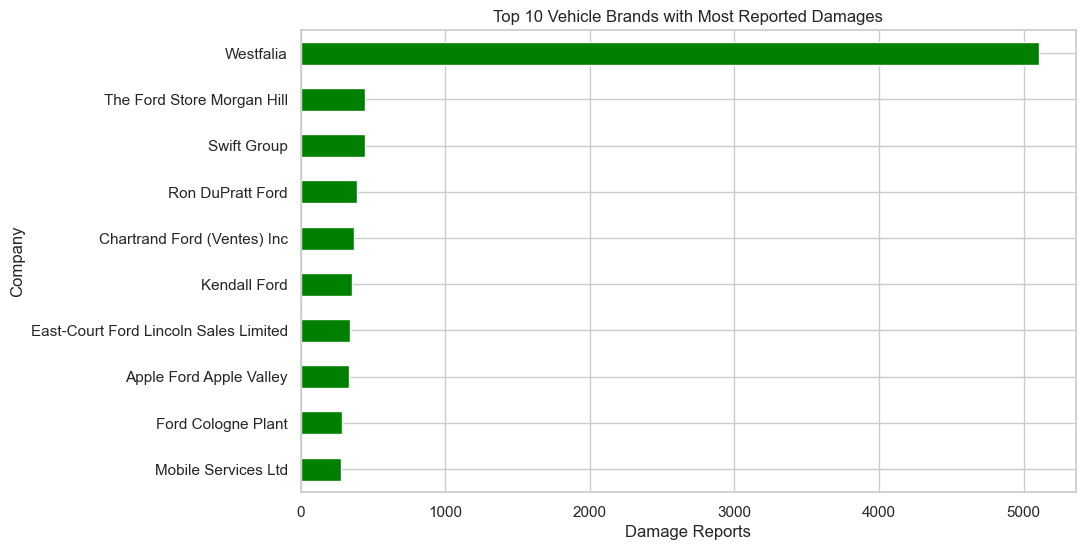

In [47]:
import matplotlib.pyplot as plt

# Extract the top 10 vehicle companies with the highest number of damage reports
top_10_damaged_companies = data['Company'].value_counts().head(10)
top_10_damaged_companies.plot(kind='barh', color='green', figsize=(10, 6))
plt.title("Top 10 Companies with Most Reported Damages")
plt.xlabel("Damage Reports")
plt.gca().invert_yaxis()
plt.show()

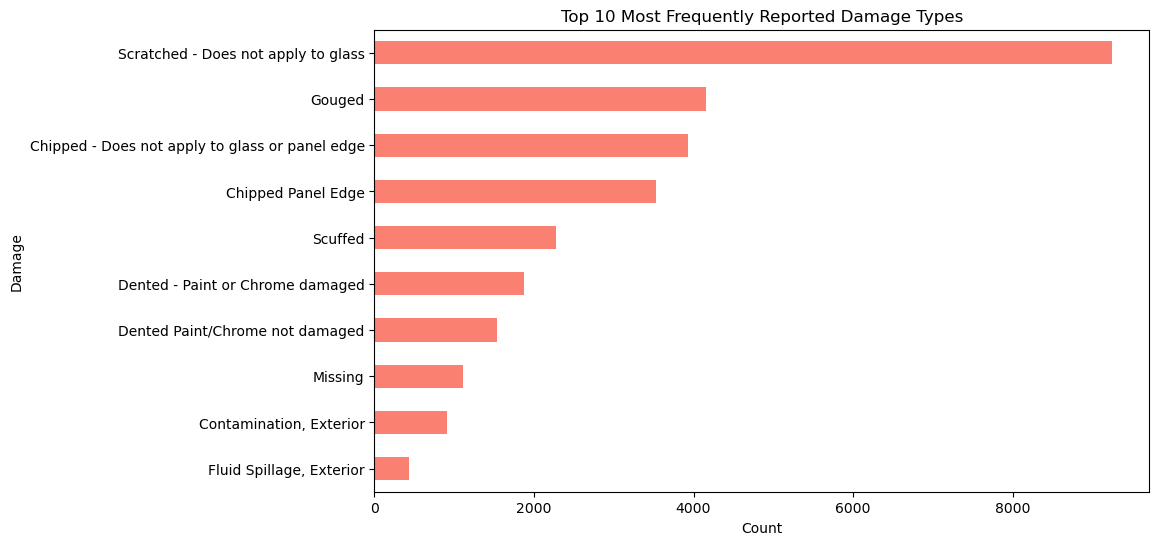

In [15]:
# Top 10 most frequently reported damage types
top_10_damages = data['Damage'].value_counts().head(10)
top_10_damages.plot(kind='barh', color='salmon', figsize=(10, 6))
plt.title("Top 10 Most Frequently Reported Damage Types")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()


In [16]:
severity_map = {
    '<1" / < 2.5cm': 1,
    'From 1" - 3" / 2.5cm - 7.5cm.': 2,
    'From 3" - 6" / 7.5cm - 15cm.': 3,
    'From 6" - 12" / 15cm - 30cm.': 4,
    '>12" / > 30cm.': 5,
    'Missing/Major Damage': 6
}

data['Severity_Num'] = data['Severity'].map(severity_map)


In [17]:
data['Severity_Num']

0        1
1        1
2        2
3        2
4        3
        ..
33521    1
33523    1
33524    1
33525    6
33526    1
Name: Severity_Num, Length: 32264, dtype: int64

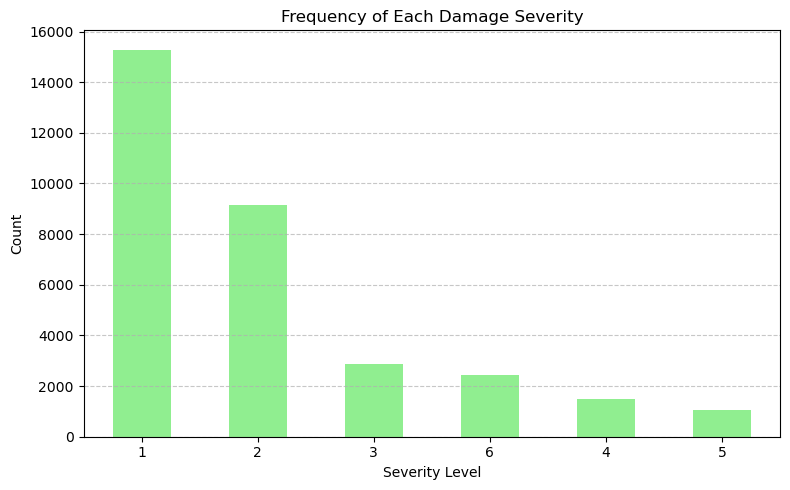

In [18]:
# Count the frequency of each severity level
severity_counts = data['Severity_Num'].value_counts()

# Plot
severity_counts.plot(kind='bar', color='lightgreen', figsize=(8, 5))
plt.title("Frequency of Each Damage Severity")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


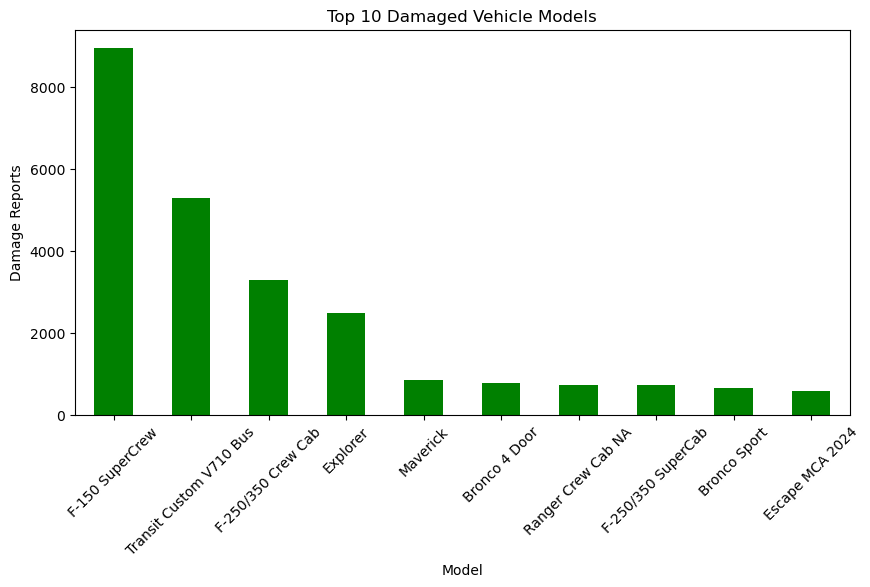

In [19]:
# Similarly for models
import matplotlib.pyplot as plt
top_models = data['Model'].value_counts().head(10)

top_models.plot(kind='bar', figsize=(10, 5), color='green')
plt.title("Top 10 Damaged Vehicle Models")
plt.ylabel("Damage Reports")
plt.xticks(rotation=45)
plt.show()

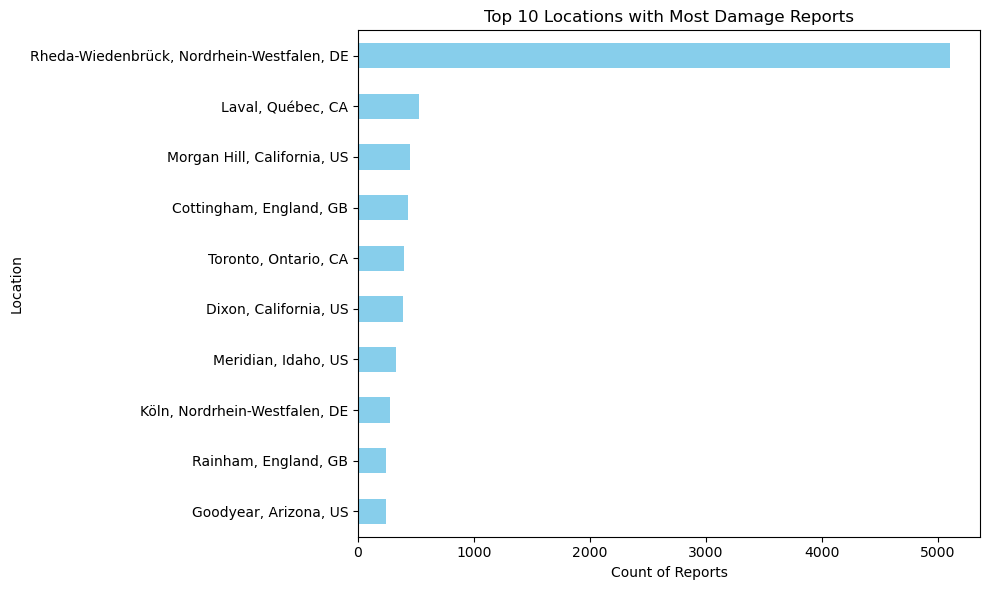

In [20]:
# Top 10 locations with most damage reports
top_locations = data['Location'].value_counts().head(10)

# Plotting
top_locations.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Locations with Most Damage Reports")
plt.xlabel("Count of Reports")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


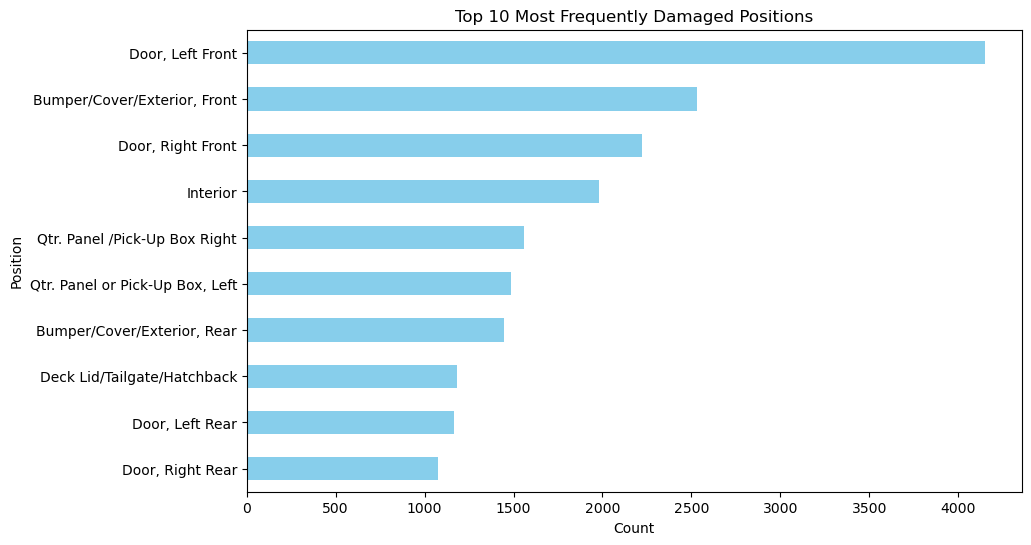

In [21]:
# Top 10 most frequently damaged positions
top_10_positions = data['Position'].value_counts().head(10)
top_10_positions.plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title("Top 10 Most Frequently Damaged Positions")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()

In [54]:
# Step 1: Group by Location and Damage type
damage_by_location = data.groupby('Location')['Damage'].value_counts().unstack().fillna(0)

# Step 2: Add total column
damage_by_location['Total'] = damage_by_location.sum(axis=1)

# Step 3: Sort by total and keep top 10 locations
top_10_locations = damage_by_location.sort_values('Total', ascending=False).head(10)

# Step 4: Find top 10 most common damage types across all locations
top_10_damage_types = data['Damage'].value_counts().head(10).index.tolist()

# Step 5: Filter the table to keep only top 10 damage types + 'Total'
filtered = top_10_locations[top_10_damage_types + ['Total']]

# Show the result
filtered


Damage,Scratched - Does not apply to glass,Gouged,Chipped - Does not apply to glass or panel edge,Chipped Panel Edge,Scuffed,Dented - Paint or Chrome damaged,Dented Paint/Chrome not damaged,Missing,"Contamination, Exterior","Fluid Spillage, Exterior",Total
Location,,,,,,,,,,,
"Rheda-Wiedenbrück, Nordrhein-Westfalen, DE",1041.0,1374.0,910.0,667.0,7.0,154.0,78.0,26.0,18.0,364.0,5107.0
"Laval, Québec, CA",363.0,34.0,17.0,5.0,33.0,10.0,13.0,5.0,20.0,6.0,525.0
"Morgan Hill, California, US",129.0,62.0,71.0,45.0,82.0,4.0,6.0,1.0,19.0,0.0,446.0
"Cottingham, England, GB",3.0,2.0,0.0,37.0,161.0,0.0,1.0,158.0,8.0,0.0,428.0
"Toronto, Ontario, CA",104.0,12.0,49.0,9.0,138.0,7.0,9.0,7.0,25.0,0.0,396.0
"Dixon, California, US",106.0,6.0,6.0,239.0,11.0,4.0,5.0,1.0,2.0,0.0,388.0
"Meridian, Idaho, US",127.0,9.0,48.0,97.0,30.0,1.0,9.0,1.0,0.0,0.0,327.0
"Köln, Nordrhein-Westfalen, DE",102.0,68.0,26.0,16.0,1.0,24.0,10.0,3.0,2.0,0.0,279.0
"Rainham, England, GB",37.0,10.0,39.0,41.0,17.0,26.0,15.0,21.0,9.0,0.0,237.0


In [61]:
# Group data by 'Position' and count occurrences of each 'Damage' type
damage_by_position = data.groupby('Position')['Damage'].value_counts().unstack().fillna(0)

# Add a 'Total' column for the sum of damages per position
damage_by_position['Total'] = damage_by_position.sum(axis=1)

# Sort positions by total damage count in descending order
damage_by_position_sorted = damage_by_position.sort_values('Total', ascending=False).head(10)

top_10_damage_types = data['Damage'].value_counts().head(10).index.tolist()

filtered = damage_by_position_sorted[top_10_damage_types + ['Total']]

# Show the result
filtered


Damage,Scratched - Does not apply to glass,Gouged,Chipped - Does not apply to glass or panel edge,Chipped Panel Edge,Scuffed,Dented - Paint or Chrome damaged,Dented Paint/Chrome not damaged,Missing,"Contamination, Exterior","Fluid Spillage, Exterior",Total
Position,,,,,,,,,,,
"Door, Left Front",1262.0,203.0,577.0,1280.0,135.0,169.0,259.0,4.0,80.0,5.0,4150.0
"Bumper/Cover/Exterior, Front",727.0,455.0,446.0,99.0,312.0,152.0,37.0,10.0,54.0,1.0,2531.0
"Door, Right Front",578.0,206.0,303.0,498.0,76.0,226.0,188.0,7.0,48.0,3.0,2222.0
Interior,0.0,791.0,0.0,0.0,269.0,0.0,0.0,0.0,26.0,376.0,1981.0
Qtr. Panel /Pick-Up Box Right,495.0,95.0,440.0,77.0,78.0,93.0,113.0,2.0,67.0,1.0,1560.0
"Qtr. Panel or Pick-Up Box, Left",527.0,71.0,309.0,79.0,96.0,95.0,118.0,7.0,75.0,4.0,1486.0
"Bumper/Cover/Exterior, Rear",422.0,287.0,151.0,78.0,177.0,142.0,49.0,7.0,26.0,0.0,1445.0
Deck Lid/Tailgate/Hatchback,293.0,77.0,234.0,195.0,42.0,118.0,86.0,3.0,75.0,1.0,1183.0
"Door, Left Rear",408.0,36.0,152.0,191.0,61.0,64.0,81.0,2.0,50.0,0.0,1163.0


In [48]:
# Count of severity by damage type
severity_by_damage = data.groupby('Damage')['Severity_Num'].value_counts().unstack().fillna(0)
#add a total column
severity_by_damage['Total'] = severity_by_damage.sum(axis=1)
#sort by total column in decending order
severity_by_damage = severity_by_damage.sort_values(by='Total', ascending=False)
severity_by_damage.head(10) #first 10 rows

Severity_Num,1,2,3,4,5,6,Total
Damage,,,,,,,
Scratched - Does not apply to glass,3294.0,3797.0,1155.0,603.0,332.0,71.0,9252.0
Gouged,1966.0,1519.0,368.0,143.0,95.0,69.0,4160.0
Chipped - Does not apply to glass or panel edge,3399.0,423.0,65.0,20.0,18.0,11.0,3936.0
Chipped Panel Edge,2976.0,462.0,37.0,12.0,4.0,45.0,3536.0
Scuffed,614.0,848.0,372.0,181.0,75.0,190.0,2280.0
Dented - Paint or Chrome damaged,554.0,598.0,243.0,160.0,132.0,186.0,1873.0
Dented Paint/Chrome not damaged,761.0,527.0,139.0,55.0,19.0,30.0,1531.0
Missing,41.0,23.0,10.0,6.0,4.0,1022.0,1106.0
"Contamination, Exterior",413.0,165.0,78.0,60.0,127.0,68.0,911.0


In [55]:
# Count of severity by damage type
severity_by_damage = data.groupby('Damage')['Severity_Num'].value_counts().unstack().fillna(0)

# Step 1: Filter for only severity level 6
severity_6_only = severity_by_damage[[6]]

# Step 2: Sort by severity 6 count in descending order
severity_6_only = severity_6_only.sort_values(by=6, ascending=False)

# Step 3: Rename column (optional)
severity_6_only.columns = ['Severity_6_Count']

# Show top 10
severity_6_only.head(10)


,Severity_6_Count
Damage,
Missing,1022.0
Scuffed,190.0
Dented - Paint or Chrome damaged,186.0
Incorrect Part or Option not as Invoiced,107.0
Hardware - Damaged,78.0
Glass Broken,76.0
Bent,72.0
Scratched - Does not apply to glass,71.0
Gouged,69.0


In [62]:
# Grouping the data by vehicle Position and Severity to identify severity trends across parts
severity_by_position = data.groupby('Position')['Severity_Num'].value_counts().unstack().fillna(0)

# Calculating the total number of severity reports per vehicle position
severity_by_position['Total'] = severity_by_position.sum(axis=1)

# Sorting the positions with most damage severity reports
severity_by_position = severity_by_position.sort_values('Total', ascending=False)

# Displaying top 10 positions by severity volume
severity_by_position.head(10)


Severity_Num,1,2,3,4,5,6,Total
Position,,,,,,,
"Door, Left Front",2712.0,1025.0,203.0,105.0,65.0,40.0,4150.0
"Bumper/Cover/Exterior, Front",1092.0,759.0,344.0,156.0,82.0,98.0,2531.0
"Door, Right Front",1353.0,600.0,111.0,69.0,36.0,53.0,2222.0
Interior,931.0,656.0,86.0,29.0,25.0,254.0,1981.0
Qtr. Panel /Pick-Up Box Right,801.0,387.0,160.0,99.0,69.0,44.0,1560.0
"Qtr. Panel or Pick-Up Box, Left",663.0,438.0,186.0,99.0,64.0,36.0,1486.0
"Bumper/Cover/Exterior, Rear",569.0,471.0,172.0,93.0,75.0,65.0,1445.0
Deck Lid/Tailgate/Hatchback,670.0,280.0,88.0,45.0,39.0,61.0,1183.0
"Door, Left Rear",587.0,296.0,133.0,80.0,45.0,22.0,1163.0


In [63]:
# Grouping the data by Location and Severity to understand the distribution of damage severities at each location
severity_by_location = data.groupby('Location')['Severity_Num'].value_counts().unstack().fillna(0)

# Adding total number of damage incidents reported per location
severity_by_location['Total'] = severity_by_location.sum(axis=1)

# Sorting locations by total severity reports
severity_by_location = severity_by_location.sort_values('Total', ascending=False)

# Displaying the top 10 locations with the most severe damage reports
severity_by_location.head(10)


Severity_Num,1,2,3,4,5,6,Total
Location,,,,,,,
"Rheda-Wiedenbrück, Nordrhein-Westfalen, DE",3088.0,1659.0,199.0,41.0,31.0,89.0,5107.0
"Laval, Québec, CA",121.0,218.0,89.0,58.0,22.0,17.0,525.0
"Morgan Hill, California, US",244.0,162.0,33.0,4.0,0.0,3.0,446.0
"Cottingham, England, GB",0.0,0.0,0.0,0.0,0.0,428.0,428.0
"Toronto, Ontario, CA",136.0,165.0,57.0,16.0,16.0,6.0,396.0
"Dixon, California, US",382.0,4.0,0.0,1.0,0.0,1.0,388.0
"Meridian, Idaho, US",231.0,73.0,10.0,6.0,5.0,2.0,327.0
"Köln, Nordrhein-Westfalen, DE",110.0,88.0,35.0,20.0,3.0,23.0,279.0
"Rainham, England, GB",50.0,77.0,36.0,21.0,14.0,39.0,237.0


C:\Users\chint\AppData\Local\Temp\ipykernel_24036\143691966.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='MonthName', order=[month_names[i] for i in sorted(month_names)], palette='rocket')


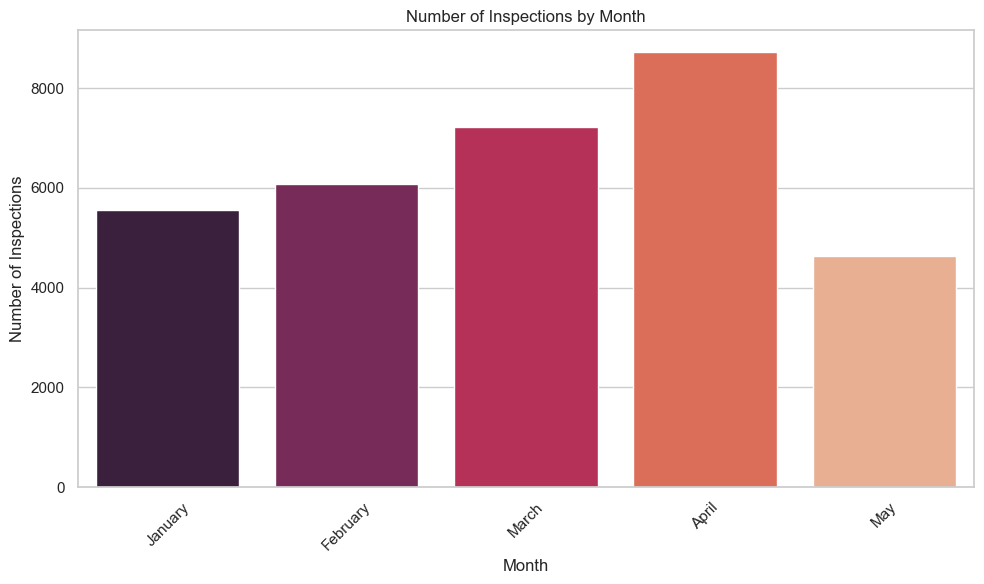

In [29]:
# Bar plot: Inspections by month
plt.figure(figsize=(10, 6))
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May"
}

# Convert numeric months to month names
data['MonthName'] = data['Month'].map(month_names)

sns.countplot(data=data, x='MonthName', order=[month_names[i] for i in sorted(month_names)], palette='rocket')
plt.title('Number of Inspections by Month')
plt.xlabel('Month')
plt.ylabel('Number of Inspections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


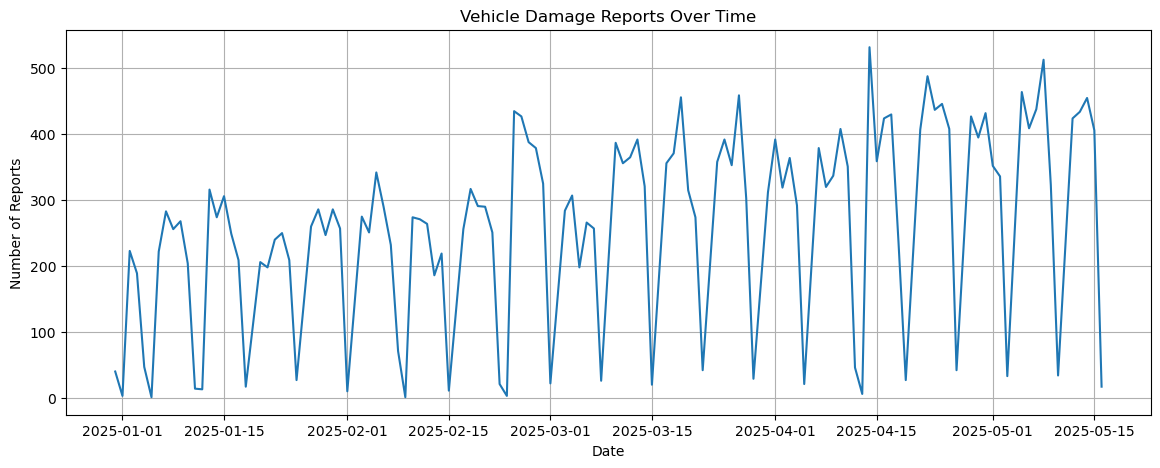

In [27]:
#Convert the column to datetime if not already
data['DateUtc'] = pd.to_datetime(data['DateUtc'])

# Extract date components
data['Date'] = data['DateUtc'].dt.date
data['Month'] = data['DateUtc'].dt.month
data['Weekday'] = data['DateUtc'].dt.day_name()

# Plot damage counts over time
import matplotlib.pyplot as plt

damage_over_time = data.groupby('Date').size()
plt.figure(figsize=(14, 5))
damage_over_time.plot()
plt.title("Vehicle Damage Reports Over Time")
plt.ylabel("Number of Reports")
plt.xlabel("Date")
plt.grid(True)
plt.show()


C:\Users\chint\AppData\Local\Temp\ipykernel_24036\2606629101.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Weekday', order=order, palette='viridis')


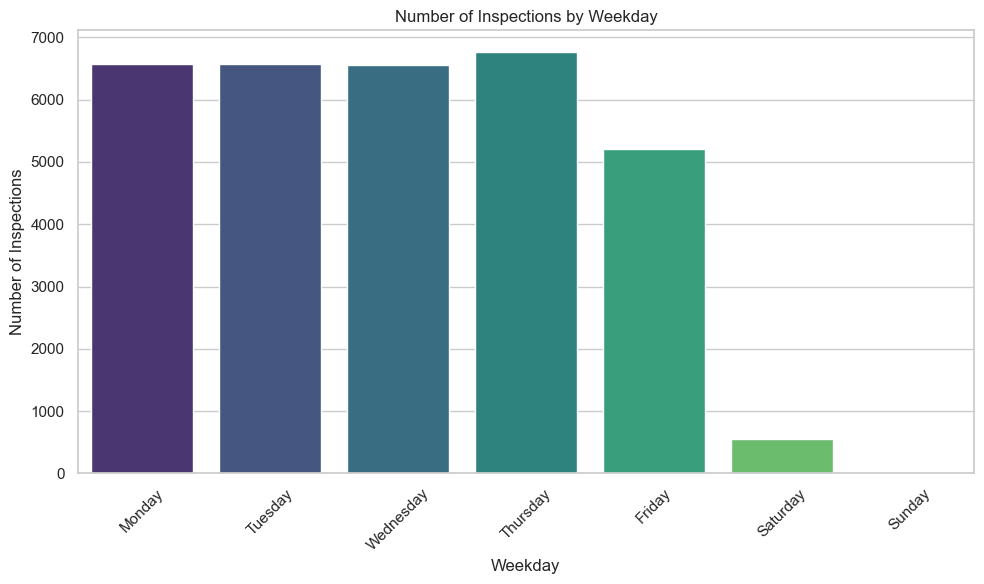

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Bar plot: Inspections by weekday
plt.figure(figsize=(10, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=data, x='Weekday', order=order, palette='viridis')
plt.title('Number of Inspections by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Inspections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
from sklearn.preprocessing import LabelEncoder

# Copy of the dataset
model_data = data.copy()

# Select features
features = ['Company', 'Model', 'Location', 'Position', 'Damage']
le = LabelEncoder()

for col in features:
    model_data[col] = le.fit_transform(model_data[col])

# Final input and target
X = model_data[features]
y = model_data['Severity_Num']


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3372  963  122   37   38   42]
 [1092 1378  164   64   35   50]
 [ 237  388  135   41   20   21]
 [ 121  150   47   92   21   21]
 [  70   93   29   26   66   19]
 [  65   63   17   12   11  558]]
              precision    recall  f1-score   support

           1       0.68      0.74      0.71      4574
           2       0.45      0.50      0.47      2783
           3       0.26      0.16      0.20       842
           4       0.34      0.20      0.25       452
           5       0.35      0.22      0.27       303
           6       0.78      0.77      0.78       726

    accuracy                           0.58      9680
   macro avg       0.48      0.43      0.45      9680
weighted avg       0.56      0.58      0.57      9680



In [32]:
print("Train labels:", sorted(y_train.unique()))
print("Test labels:", sorted(y_test.unique()))


Train labels: [1, 2, 3, 4, 5, 6]
Test labels: [1, 2, 3, 4, 5, 6]


In [33]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Changing severity number
severity_map = {
    '<1" / < 2.5cm': 0,
    'From 1" - 3" / 2.5cm - 7.5cm.': 1,
    'From 3" - 6" / 7.5cm - 15cm.': 2,
    'From 6" - 12" / 15cm - 30cm.': 3,
    '>12" / > 30cm.': 4,
    'Missing/Major Damage': 5
}

model_data['Severity_Score'] = data['Severity'].map(severity_map)
y = model_data['Severity_Score']

# 2. SMOTE for balancing classes
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# 4. Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\chint\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:03:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[3057  907  256  132  120   74]
 [ 894 2305  633  348  281  155]
 [ 271  607 2395  628  390  297]
 [ 143  278  558 2904  390  301]
 [ 101  183  319  410 3387  237]
 [  64   78  158  211  228 3810]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      4546
           1       0.53      0.50      0.51      4616
           2       0.55      0.52      0.54      4588
           3       0.63      0.63      0.63      4574
           4       0.71      0.73      0.72      4637
           5       0.78      0.84      0.81      4549

    accuracy                           0.65     27510
   macro avg       0.65      0.65      0.65     27510
weighted avg       0.65      0.65      0.65     27510



In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 1: Prepare data
features = ['Company', 'Location', 'Position', 'Make', 'Model']
target = 'Damage'

model_data = data[features + [target]].dropna()

# Encode features
encoders = {}
for col in features + [target]:
    le = LabelEncoder()
    model_data[col] = le.fit_transform(model_data[col])
    encoders[col] = le

X = model_data[features]
y = model_data[target]

# Step 4: SMOTE resampling
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 7: Evaluate
y_pred = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoders[target].inverse_transform(sorted(set(y_test)))))


Confusion Matrix:
 [[1706    5   26    5    4   28    0    7    3    1    1    0    0    0
     2    7    9    3    0    1    0    3    2   39    1    7    7    5
     0    0]
 [  26  787  226   44   21   28    3   57   53    2    2    2    5    1
    10   83   17   14    3    2    1   15   22  235    9  126   61    3
     1    1]
 [  20   68 1321   23   10   25    7   34   65    1    3    3    3    0
     3   35    8   13    3    2    0    3   12   19    3   81   35    3
     1    1]
 [  14   25   30 1533    7    2    1    9   14   27    0    5    2    7
     9    8    9    5    5    0    0    3    4    0    0   50   33    1
     0    1]
 [   6   11    6    7 1690    0    0    5    3   37    0    2    1    8
     4   11   15    4    0    1    0   14    0   19    5   16   12    0
     0    1]
 [   6    2    1    2    2 1669    3    1    3   67    9    1    2    0
     0    6    0    0   52    1    0    3    1    0    7    1    4    0
     0    0]
 [   0    1   87    2    0    0 1710   

In [66]:
print("Damage class distribution:")
print(data['Damage'].value_counts())
print(y.value_counts())

Damage class distribution:
Damage
Scratched - Does not apply to glass                9252
Gouged                                             4160
Chipped - Does not apply to glass or panel edge    3936
Chipped Panel Edge                                 3536
Scuffed                                            2280
Dented - Paint or Chrome damaged                   1873
Dented Paint/Chrome not damaged                    1531
Missing                                            1106
Contamination, Exterior                             911
Fluid Spillage, Exterior                            434
Cracked - Does not apply to glass                   309
Hardware - Damaged                                  305
Molding/Emblem/Weather-Strip Damaged                297
Torn                                                297
Bent                                                291
Stained or Soiled - Interior                        213
Decal/Paint Stripe Damaged                          170
Punctured     